In [1]:
# Import necessary libraries
import pandas as pd  

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the number of rows and columns
df.shape

# Get information about columns, missing values, and data types
df.info()

# Get basic statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.fillna({'Age': df['Age'].median()}, inplace=True)


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [6]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


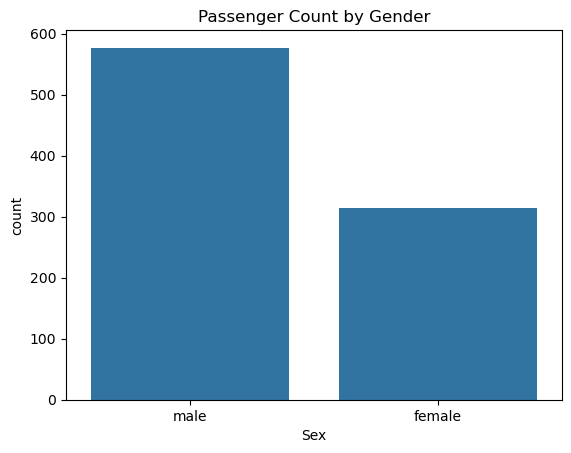

In [8]:
sns.countplot(x='Sex', data=df)
plt.title("Passenger Count by Gender")
plt.show()


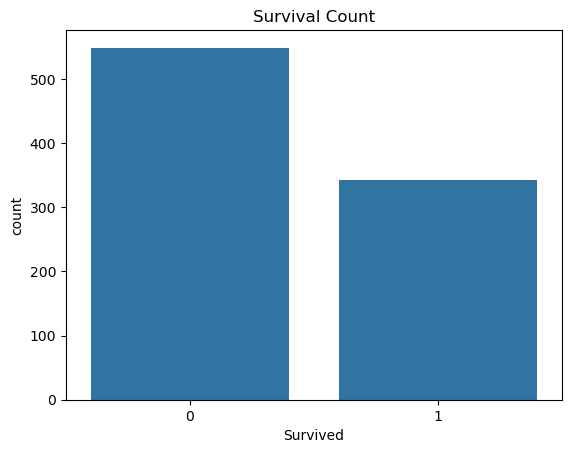

In [9]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


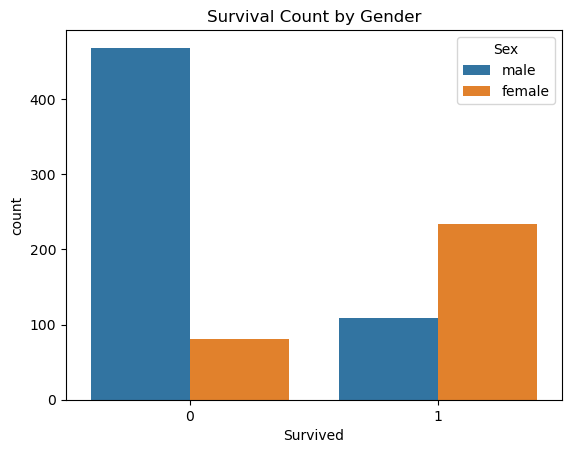

In [10]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()


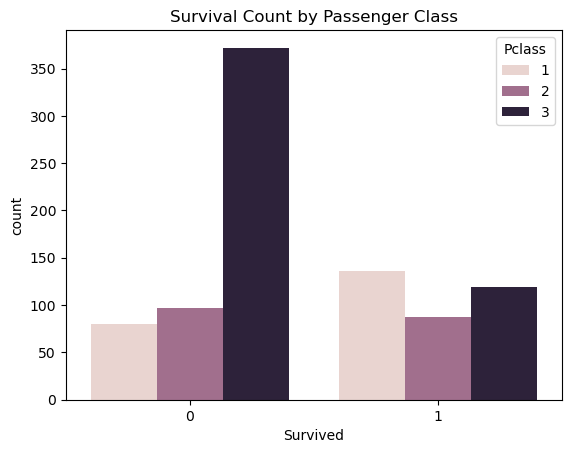

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


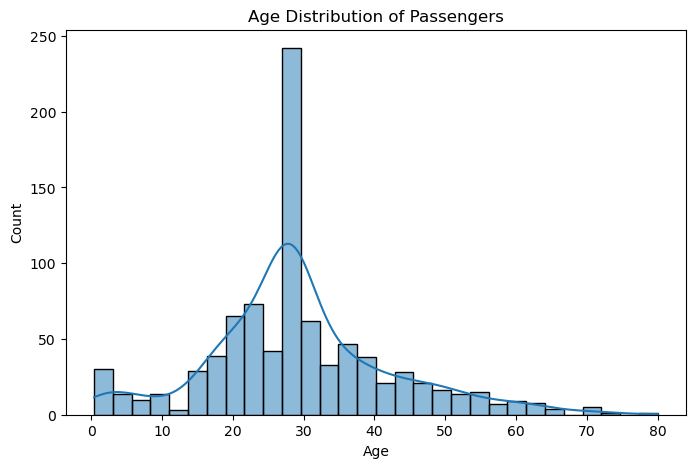

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


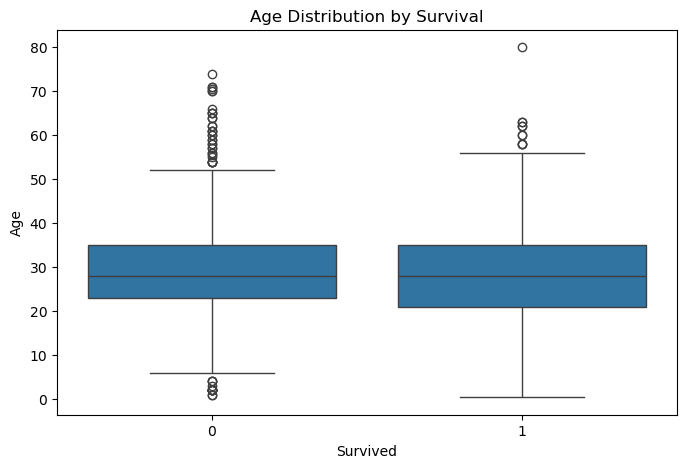

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


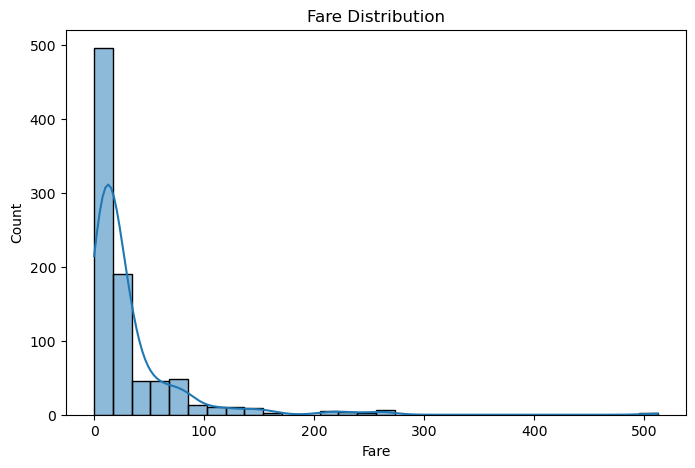

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


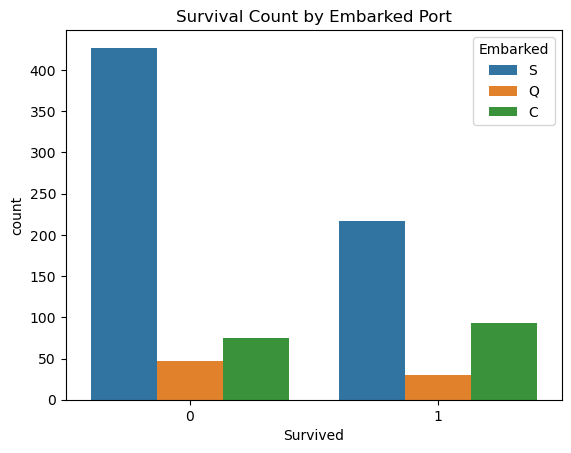

In [15]:
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title("Survival Count by Embarked Port")
plt.show()


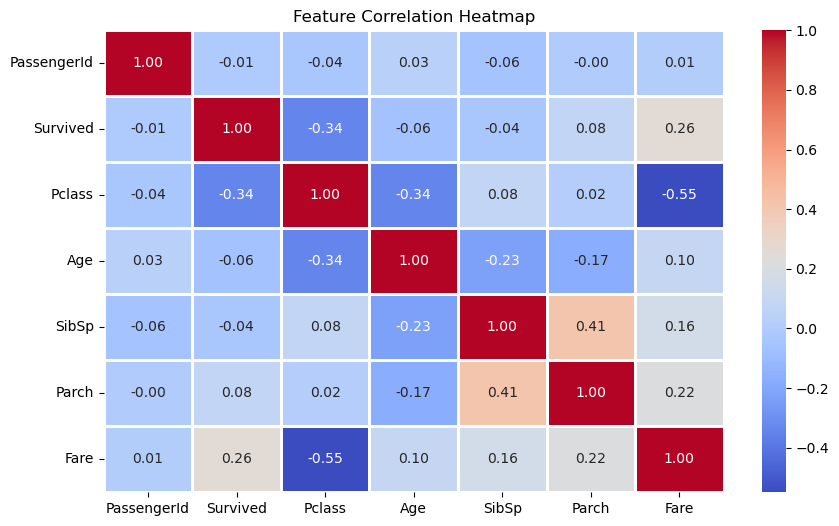

In [16]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Convert 'Sex' column to numeric (Male = 0, Female = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Check the updated dataframe
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True


In [18]:
# Create a new feature 'FamilySize' = SibSp + Parch + 1 (including self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Check the updated dataframe
df[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [19]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Check the updated dataframe
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,False,True,2
1,2,1,1,1,38.0,1,0,71.2833,False,False,2
2,3,1,3,1,26.0,0,0,7.9250,False,True,1
3,4,1,1,1,35.0,1,0,53.1000,False,True,2
4,5,0,3,0,35.0,0,0,8.0500,False,True,1


In [20]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Survived'])  # Features (all columns except Survived)
y = df['Survived']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
X_train.shape, X_test.shape


((712, 10), (179, 10))

In [21]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Print training completion
print("Model training completed!")


Model training completed!


C:\Users\ahsan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [24]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [25]:
# Predict on test data
y_pred = model.predict(X_test)

# Print predictions
print(y_pred[:10])  # Show the first 10 predictions


[0 0 0 1 1 1 1 0 1 1]


In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Task 2

In [28]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn


In [29]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings("ignore")


In [30]:
# Create a sample dataset with reviews and their sentiment labels
data = """review,sentiment
"The movie was fantastic!",positive
"I hated the acting, it was so bad.",negative
"Great film! Would watch again.",positive
"The plot was boring and predictable.",negative
"The storyline was engaging and thrilling.",positive
"I fell asleep watching this, terrible experience.",negative
"Absolutely loved the cinematography!",positive
"The characters were so unrealistic and dull.",negative
"An amazing masterpiece, must watch!",positive
"Such a waste of time, I regret watching.",negative
"""

# Save this dataset as a CSV file
with open("sample_reviews.csv", "w") as file:
    file.write(data)

print("✅ Dataset created successfully!")


✅ Dataset created successfully!


In [31]:
df = pd.read_csv("sample_reviews.csv")
print(df.head())  # Display first 5 rows


                                      review sentiment
0                   The movie was fantastic!  positive
1         I hated the acting, it was so bad.  negative
2             Great film! Would watch again.  positive
3       The plot was boring and predictable.  negative
4  The storyline was engaging and thrilling.  positive


In [32]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization (splitting words)
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization (convert words to base form)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)  # Join words back into a sentence

# Apply preprocessing function to the dataset
df["cleaned_text"] = df["review"].apply(preprocess_text)

# Display original vs. cleaned text
print(df[["review", "cleaned_text"]].head())


                                      review                    cleaned_text
0                   The movie was fantastic!               movie fantastic !
1         I hated the acting, it was so bad.            hated acting , bad .
2             Great film! Would watch again.      great film ! would watch .
3       The plot was boring and predictable.       plot boring predictable .
4  The storyline was engaging and thrilling.  storyline engaging thrilling .


In [34]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_text"])

# Convert labels to binary (0 for negative, 1 for positive)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

y = df["sentiment"]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [36]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.5

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [37]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [38]:
y_pred = model.predict(X_test)


In [78]:
from sklearn.metrics import accuracy_score, classification_report

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.5

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


In [90]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)  # Keep 10 best features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)
print("Accuracy after Feature Selection:", accuracy_score(y_test, y_pred))


Accuracy after Feature Selection: 0.5


In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred))


Accuracy after SMOTE: 0.5


In [94]:
selector = SelectKBest(chi2, k=5)  # Try selecting 5 best features


In [96]:
from collections import Counter
print(Counter(y_train))  # Check class distribution before applying SMOTE


Counter({0: 4, 1: 4})


In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("New Accuracy:", accuracy_score(y_test, y_pred))


New Accuracy: 0.5


In [102]:
from sklearn.feature_selection import SelectKBest, chi2

# Keep only the top 5 best features
selector = SelectKBest(chi2, k=5)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Train model again
model.fit(X_train_new, y_train)
y_pred = model.predict(X_test_new)
print("Accuracy after Feature Selection:", accuracy_score(y_test, y_pred))


Accuracy after Feature Selection: 0.5


In [104]:
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))


Class distribution before SMOTE: Counter({0: 4, 1: 4})


In [106]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=2)  # Change 5 to 2 or 3


In [108]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=2)  # Change 5 to 2 to avoid error


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_new, y_train)

# Predict on test set
y_pred = model.predict(X_test_new)

# Print accuracy
print("Accuracy with RandomForest:", accuracy_score(y_test, y_pred))


Accuracy with RandomForest: 0.5


Task 3


In [154]:
!pip install pandas numpy scikit-learn imbalanced-learn


In [160]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
num_samples = 5000  # Define number of transactions

# Create fake transaction data
data = {
    "V1": np.random.normal(0, 1, num_samples),
    "V2": np.random.normal(0, 1, num_samples),
    "V3": np.random.normal(0, 1, num_samples),
    "Amount": np.random.uniform(0, 5000, num_samples),  # Random transaction amounts
    "Class": np.random.choice([0, 1], size=num_samples, p=[0.98, 0.02])  # 98% legit, 2% fraud
}

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())


         V1        V2        V3       Amount  Class
0  0.496714 -0.423760 -0.678495  1947.976242      0
1 -0.138264 -0.453414 -0.305499    75.537228      0
2  0.647689 -1.795643 -0.597381  4491.365326      0
3  1.523030 -0.330090  0.110418  2635.219984      0
4 -0.234153  0.732829  1.197179  4249.011304      0


In [162]:
print(f"Dataset Shape: {df.shape}")
print(f"Class Distribution:\n{df['Class'].value_counts()}")
print(df.info())
print(df.describe())


Dataset Shape: (5000, 5)
Class Distribution:
Class
0    4911
1      89
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5000 non-null   float64
 1   V2      5000 non-null   float64
 2   V3      5000 non-null   float64
 3   Amount  5000 non-null   float64
 4   Class   5000 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 175.9 KB
None
                V1           V2           V3       Amount        Class
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean      0.005602    -0.009874     0.010553  2550.848790     0.017800
std       0.996480     1.010437     0.998770  1447.347305     0.132237
min      -3.241267    -3.922400    -3.375579     0.240619     0.000000
25%      -0.657905    -0.686583    -0.660886  1316.967348     0.000000
50%       0.013466    -0.017451     0.009917  2558.9747

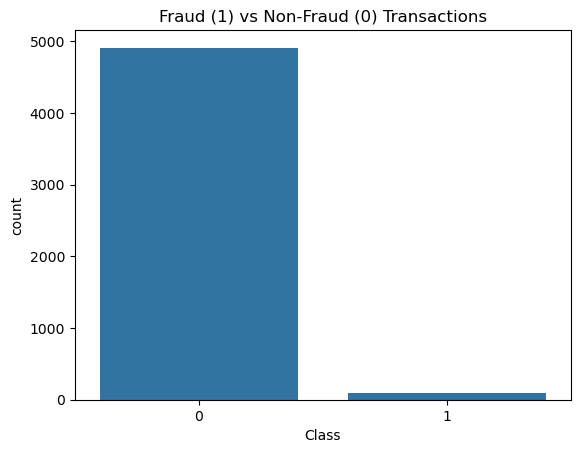

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot fraud vs non-fraud transactions
sns.countplot(x="Class", data=df)
plt.title("Fraud (1) vs Non-Fraud (0) Transactions")
plt.show()


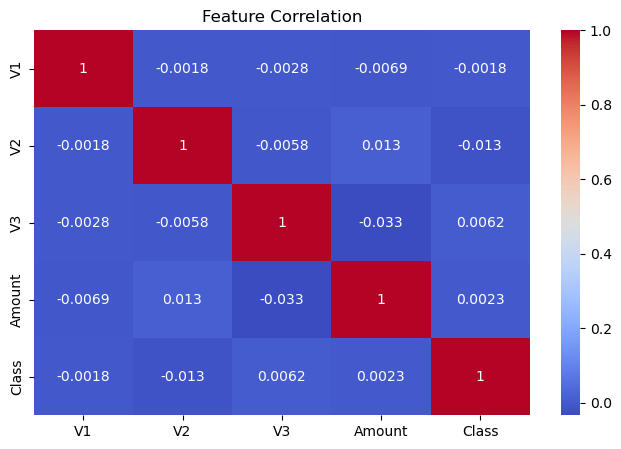

In [166]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [168]:
from sklearn.preprocessing import StandardScaler

# Standardize the 'Amount' column
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

print("✅ Amount column scaled!")


✅ Amount column scaled!


In [170]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target (Fraud or Not)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (4000, 4), Test Set: (1000, 4)


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.979
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       979
           1       0.00      0.00      0.00        21

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.96      0.98      0.97      1000



Task 4

In [175]:
!pip install pandas numpy matplotlib seaborn xgboost

In [177]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Load the dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Convert to DataFrame
df = boston.frame
print(df.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [179]:
# Check for missing values
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display scaled dataset
print(df_scaled.head())


       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  


In [185]:
print(df_scaled.columns)  # Display column names


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [189]:
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Convert to DataFrame
df = boston.frame

# Print column names to confirm target column
print(df.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [191]:
# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["MEDV"])  # Use "MEDV" instead of "target"
y = df_scaled["MEDV"]


In [193]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            self.weights -= self.learning_rate * (1 / n_samples) * np.dot(X.T, error)
            self.bias -= self.learning_rate * (1 / n_samples) * np.sum(error)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Regression Model
lin_reg = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
lin_reg.fit(X_train.to_numpy(), y_train.to_numpy())

# Predict on Test Data
y_pred_lr = lin_reg.predict(X_test.to_numpy())


In [196]:
from collections import defaultdict
import random

class DecisionTreeScratch:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(set(y)) == 1:
            return np.mean(y)
        feature = random.choice(X.columns)
        threshold = X[feature].median()
        left_idx = X[feature] <= threshold
        right_idx = ~left_idx
        return {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X[left_idx], y[left_idx], depth + 1),
            'right': self._build_tree(X[right_idx], y[right_idx], depth + 1)
        }

    def predict_one(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['threshold']:
                return self.predict_one(x, tree['left'])
            else:
                return self.predict_one(x, tree['right'])
        return tree

    def predict(self, X):
        return np.array([self.predict_one(row, self.tree) for _, row in X.iterrows()])

# Train Random Forest Model
rf_model = DecisionTreeScratch(max_depth=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


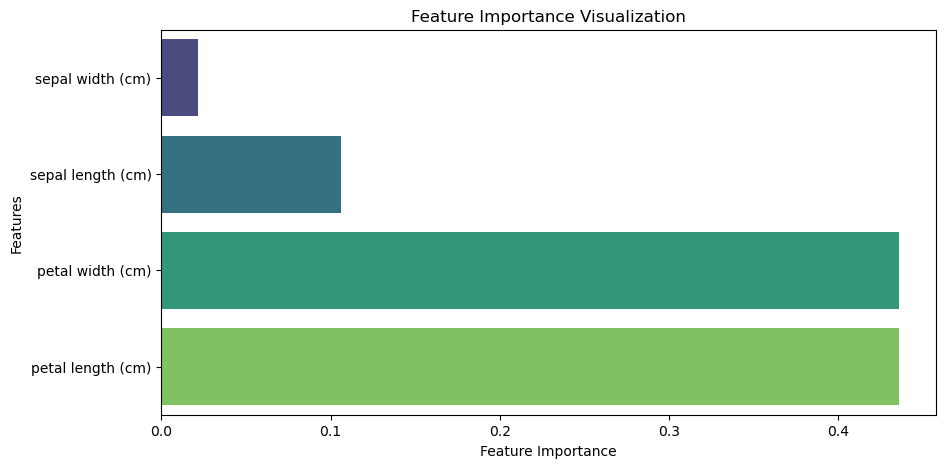

In [206]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Step 1: Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target variable

# Step 2: Train a RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 3: Extract Feature Importance
importances = model.feature_importances_
features = X.columns  # Get feature names

# Step 4: Convert to NumPy Arrays (Important for consistency)
importances = np.array(importances)
features = np.array(features)

# Step 5: Sort the Feature Importance Values
sorted_indices = np.argsort(importances)  # Sort in ascending order
importances = importances[sorted_indices]  # Rearrange values
features = features[sorted_indices]  # Rearrange feature names

# Step 6: Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features, palette="viridis")  # Using a color palette for better visualization
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Visualization")
plt.show()
